## NN in keras for custom dataset - example-3

In [1]:
import os

import numpy as np

import cv2

import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras import optimizers
from keras.utils import np_utils
from keras import backend as K

from sklearn.utils import shuffle

## Define path and necessary parameters

In [4]:
PATH = os.getcwd()
# Define data path
train_data_path = os.path.join(PATH ,'data_4_class','train')
test_data_path = os.path.join(PATH ,'data_4_class','test')
# Read out the folders or data classes
train_data_dir_list = os.listdir(train_data_path)
test_data_dir_list = os.listdir(test_data_path)
print ('data_list: ', test_data_dir_list)
num_classes=2
# Assign Labels to the datset
labels={'cats':0,'dogs':1, 'horses':2, 'humans':3}
img_rows=32
img_cols=32

num_epoch=100
batch_size=32

data_list:  ['cats', 'dogs', 'horses', 'humans']


## Load the train files and assign labels to each file

In [5]:
# the list to store the name and label of files
train_data_files = []
train_data_labels = []

# Loop over each class and read the train files and store it in list declared above
for data_dir in train_data_dir_list:
    label=labels[data_dir]
    print ('Loading the files of dataset-'+'{}\n'.format(data_dir))
    files=os.listdir(os.path.join(train_data_path,data_dir))
    #print (files)
    for file in files:
        f_name = os.path.join(data_dir,file)
        train_data_files.append(f_name)
        train_data_labels.append(label)

num_train_samples = len(train_data_files)
print ('num of train samples:',num_train_samples)

#Shuffle the dataset
train_data_files,train_data_labels = shuffle(train_data_files,train_data_labels, random_state=2)

Loading the files of dataset-cats

Loading the files of dataset-dogs

Loading the files of dataset-horses

Loading the files of dataset-humans

num of train samples: 400


In [6]:
print (train_data_files[0:10])


['cats\\cat.94.jpg', 'cats\\cat.38.jpg', 'horses\\horse-31.jpg', 'dogs\\dog.60.jpg', 'humans\\rider-6.jpg', 'cats\\cat.31.jpg', 'cats\\cat.7.jpg', 'dogs\\dog.9.jpg', 'humans\\rider-12.jpg', 'horses\\horse-32.jpg']


## Load the test files and assign labels to each file

In [7]:
# the list to store the name and label of files
test_data_files = []
test_data_labels = []

# Loop over each class and read the train files and store it in list declared above
for data_dir in test_data_dir_list:
    label=labels[data_dir]
    print ('Loading the files of dataset-'+'{}\n'.format(data_dir))
    files=os.listdir(os.path.join(test_data_path,data_dir))
    #print (files)
    for file in files:
        f_name = os.path.join(data_dir,file)
        test_data_files.append(f_name)
        test_data_labels.append(label)

num_test_samples = len(test_data_files)
print ('num of test samples:',num_test_samples)

#Shuffle the dataset
test_data_files,test_data_labels = shuffle(test_data_files,test_data_labels, random_state=2)

Loading the files of dataset-cats

Loading the files of dataset-dogs

Loading the files of dataset-horses

Loading the files of dataset-humans

num of test samples: 80


## Define a function to read the loaded file names

In [10]:
## Define a function to read the loaded file names​​# define the function to read the test data
def read_data(data_category='train'):
    x=[]
    y=[]
    if data_category == 'train':
        data_path = train_data_path
        data_files = train_data_files
        data_labels = train_data_labels
        
    elif data_category == 'test':
        data_path = test_data_path
        data_files = test_data_files
        data_labels = test_data_labels
        
    for file_name,lab in zip(data_files,data_labels):
        #print ('file_read: ', data_path+'\\'+fil)
        img_name = os.path.join(data_path,file_name)
        img = cv2.imread(img_name)
        img=cv2.resize(img,(img_rows,img_cols))
        #cv2.imshow('img',img)
        #cv2.waitKey(1)
        x.append(img)
        y.append(lab)
    return x,y

In [11]:
#read the train data
X_train,y_train = read_data(data_category='train')
X_train,y_train=np.array(X_train),np.array(y_train)
m_train = X_train.shape[0]
img_size = X_train[0].shape
print ("Number of training examples: m_train = " + str(m_train))
print ("Each image is of size:", img_size)
print ("X_train shape: " + str(X_train.shape))
print ("Label shape: " + str(y_train.shape))

Number of training examples: m_train = 400
Each image is of size: (32, 32, 3)
X_train shape: (400, 32, 32, 3)
Label shape: (400,)


## Read the test data from loaded file name

In [12]:
#read the test data
X_test,y_test = read_data(data_category='test')
X_test,y_test = np.array(X_test),np.array(y_test)
m_test = X_test.shape[0]
img_size = X_test[0].shape
print ("Number of test examples: m_test = " + str(m_test))
print ("Each image is of size:", img_size)
print ("test_set_x shape: " + str(X_test.shape))
print ("Label shape: " + str(y_test.shape))

Number of test examples: m_test = 80
Each image is of size: (32, 32, 3)
test_set_x shape: (80, 32, 32, 3)
Label shape: (80,)


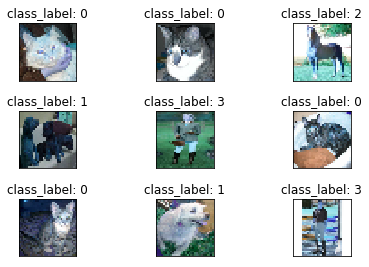

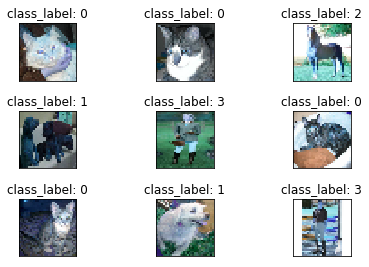

In [13]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("class_label: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [14]:
# let's print the shape before we reshape and normalize
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 3, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 3, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 3)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape (400, 32, 32, 3)
y_train shape (400,)
X_test shape (80, 32, 32, 3)
y_test shape (80,)
x_train shape: (400, 32, 32, 3)
400 train samples
80 test samples


In [15]:
print(np.unique(y_train, return_counts=True))

(array([0, 1, 2, 3]), array([100, 100, 100, 100], dtype=int64))


In [16]:
# one-hot encoding using keras' numpy-related utilities
num_classes = 4
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, num_classes)
Y_test = np_utils.to_categorical(y_test, num_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (400,)
Shape after one-hot encoding:  (400, 4)


In [17]:
num_epoch=50
batch_size=128

In [21]:
# building a linear stack of layers with the sequential model
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
#model.add(Conv2D(32, (3, 3)))
#model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3, 3)))
model.add(Activation('relu'))
#model.add(Conv2D(64, (3, 3)))
#model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

# Fully connected layer
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes))

model.add(Activation('softmax'))

In [22]:
# compiling the sequential model
opt = optimizers.Adam()
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt)

In [23]:
hist = model.fit(X_train,Y_train,batch_size=batch_size, validation_data=(X_test,Y_test),epochs=num_epoch)

Train on 400 samples, validate on 80 samples
Epoch 1/100
400/400 [==============================] - 2s 5ms/step - loss: 1.4020 - acc: 0.2550 - val_loss: 1.3268 - val_acc: 0.4750
Epoch 2/100
400/400 [==============================] - 1s 3ms/step - loss: 1.3331 - acc: 0.4275 - val_loss: 1.2758 - val_acc: 0.4500
Epoch 3/100
400/400 [==============================] - 1s 2ms/step - loss: 1.2780 - acc: 0.4125 - val_loss: 1.2003 - val_acc: 0.4750
Epoch 4/100
400/400 [==============================] - 1s 2ms/step - loss: 1.2146 - acc: 0.4925 - val_loss: 1.1659 - val_acc: 0.5125
Epoch 5/100
400/400 [==============================] - 1s 2ms/step - loss: 1.1676 - acc: 0.5150 - val_loss: 1.0904 - val_acc: 0.6250
Epoch 6/100
400/400 [==============================] - 1s 2ms/step - loss: 1.1164 - acc: 0.5375 - val_loss: 1.0040 - val_acc: 0.6875
Epoch 7/100
400/400 [==============================] - 1s 2ms/step - loss: 1.0391 - acc: 0.6075 - val_loss: 0.9478 - val_acc: 0.6625
Epoch 8/100
400/400 [===

Epoch 62/100
400/400 [==============================] - 1s 2ms/step - loss: 0.0543 - acc: 0.9975 - val_loss: 0.0299 - val_acc: 1.0000
Epoch 63/100
400/400 [==============================] - 1s 2ms/step - loss: 0.0570 - acc: 0.9950 - val_loss: 0.0455 - val_acc: 1.0000
Epoch 64/100
400/400 [==============================] - 1s 2ms/step - loss: 0.0656 - acc: 0.9900 - val_loss: 0.0307 - val_acc: 1.0000
Epoch 65/100
400/400 [==============================] - 1s 2ms/step - loss: 0.0555 - acc: 0.9900 - val_loss: 0.0401 - val_acc: 1.0000
Epoch 66/100
400/400 [==============================] - 1s 2ms/step - loss: 0.0536 - acc: 0.9975 - val_loss: 0.0296 - val_acc: 1.0000
Epoch 67/100
400/400 [==============================] - 1s 2ms/step - loss: 0.0543 - acc: 0.9900 - val_loss: 0.0393 - val_acc: 1.0000
Epoch 68/100
400/400 [==============================] - 1s 2ms/step - loss: 0.0455 - acc: 0.9975 - val_loss: 0.0217 - val_acc: 1.0000
Epoch 69/100
400/400 [==============================] - 1s 2ms

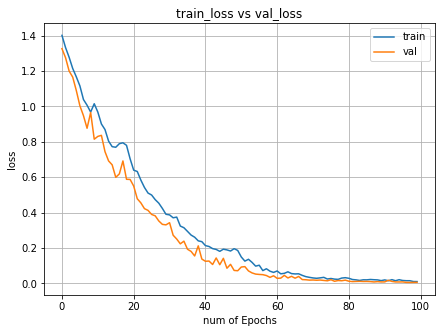

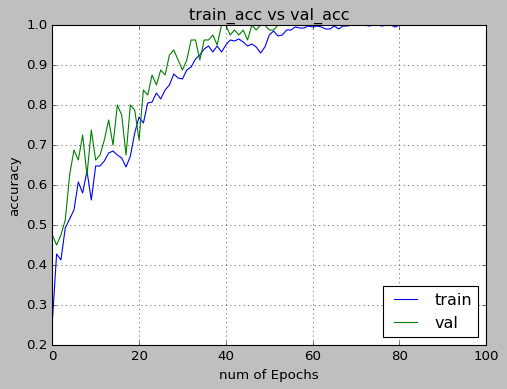

In [24]:
# visualizing losses and accuracy
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']
xc=range(num_epoch)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

# to save figure
plt.savefig('loss_curve_cnn_ex-2')

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])
# to save figure
plt.savefig('acc_curve_cnn_ex-2')

In [25]:
score = model.evaluate(X_test, Y_test)
print (score)
print ('loss:', score[0])
print ('acc: ', str(score[1]*100) + '%')

80/80 [==============================] - 0s 3ms/step
[0.005908492393791676, 1.0]
loss: 0.005908492393791676
acc:  100.0%


In [26]:
# Predict output probability
model.predict(X_test[10:11])

array([[4.5805792e-03, 9.9064106e-01, 3.9258427e-03, 8.5253990e-04]],
      dtype=float32)

In [27]:
Y_test[10:11]

array([[0., 1., 0., 0.]], dtype=float32)

In [28]:
model.predict_classes(X_test[10:15])

array([1, 1, 2, 0, 3], dtype=int64)

In [29]:
from keras.models import load_model

In [30]:
model.save('cnn_model_ex-2.h5')

In [31]:
loaded_model=load_model('cnn_model_ex-2.h5')

In [32]:
loaded_model.predict_classes(X_test[10:15])

array([1, 1, 2, 0, 3], dtype=int64)

In [33]:
# model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 13, 13, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
__________

In [34]:
model.get_config()

[{'class_name': 'Conv2D',
  'config': {'activation': 'linear',
   'activity_regularizer': None,
   'batch_input_shape': (None, 32, 32, 3),
   'bias_constraint': None,
   'bias_initializer': {'class_name': 'Zeros', 'config': {}},
   'bias_regularizer': None,
   'data_format': 'channels_last',
   'dilation_rate': (1, 1),
   'dtype': 'float32',
   'filters': 32,
   'kernel_constraint': None,
   'kernel_initializer': {'class_name': 'VarianceScaling',
    'config': {'distribution': 'uniform',
     'mode': 'fan_avg',
     'scale': 1.0,
     'seed': None}},
   'kernel_regularizer': None,
   'kernel_size': (3, 3),
   'name': 'conv2d_1',
   'padding': 'valid',
   'strides': (1, 1),
   'trainable': True,
   'use_bias': True}},
 {'class_name': 'Activation',
  'config': {'activation': 'relu', 'name': 'activation_1', 'trainable': True}},
 {'class_name': 'MaxPooling2D',
  'config': {'data_format': 'channels_last',
   'name': 'max_pooling2d_1',
   'padding': 'valid',
   'pool_size': (2, 2),
   'strid

In [35]:
len(model.layers)

12

In [36]:
model.layers[0].input_shape

(None, 32, 32, 3)

In [37]:
model.layers[0].output_shape

(None, 30, 30, 32)

In [38]:
model.layers[0].get_weights()

[array([[[[ 8.19238052e-02, -3.71385030e-02, -1.08902017e-02,
            1.03664227e-01,  4.53385059e-03, -6.42420650e-02,
           -1.36395440e-01,  1.56494096e-01,  7.30174780e-02,
            9.17340722e-03,  9.44047347e-02, -8.70101750e-02,
           -1.06654227e-01,  5.97806908e-02,  1.64887860e-01,
            1.14033245e-01,  4.24662326e-03, -3.11375316e-02,
           -1.81688994e-01,  1.05825372e-01,  1.22474656e-01,
            1.04361728e-01, -2.96205785e-02, -1.10210991e-02,
            4.98054549e-02, -1.44331440e-01,  9.09649283e-02,
            1.34873033e-01,  1.55014753e-01,  7.98237920e-02,
           -1.31674096e-01,  1.13765500e-01],
          [-1.08307801e-01, -6.91680163e-02,  1.52926326e-01,
           -1.20849617e-01, -1.07512735e-01, -3.62068973e-02,
           -9.48243216e-02, -4.00069430e-02, -1.22252270e-03,
            1.19602673e-01, -1.88520513e-02, -7.94385374e-02,
           -5.34975603e-02,  5.64488135e-02,  7.70513788e-02,
            3.70785221e-

In [39]:
wt = model.layers[0].get_weights()
#wt.shape
weights = wt[0]
bias = wt[1]
print ('weights_shape: ',wt[0].shape)
print ('bias_shape: ',wt[1].shape)

weights_shape:  (3, 3, 3, 32)
bias_shape:  (32,)


In [40]:
model.layers[0].trainable

True

### Visualizing intermediate Layers

In [41]:
def get_featuremaps(model, layer_idx, X_batch):
    get_activations = K.function([model.layers[0].input, K.learning_phase()],[model.layers[layer_idx].output,])
    activations = get_activations([X_batch,0])
    return activations

test_image_shape:  (1, 32, 32, 3)
(1, 1, 13, 13, 64)
(13, 13, 64)


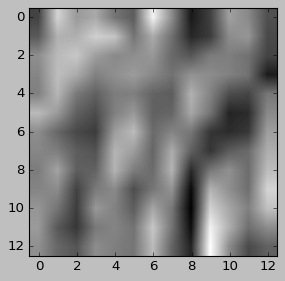

In [42]:

layer_num=3
filter_num=0
test_image = X_test[0:1]
print ('test_image_shape: ',test_image.shape)
activations = get_featuremaps(model, int(layer_num),test_image)

print (np.shape(activations))
feature_maps = activations[0][0]      
print (np.shape(feature_maps))

fig=plt.figure(figsize=(4,4))
plt.imshow(feature_maps[:,:,filter_num],cmap='gray')
plt.savefig("featuremaps-layer-{}".format(layer_num) + "-filternum-{}".format(filter_num)+'.jpg')

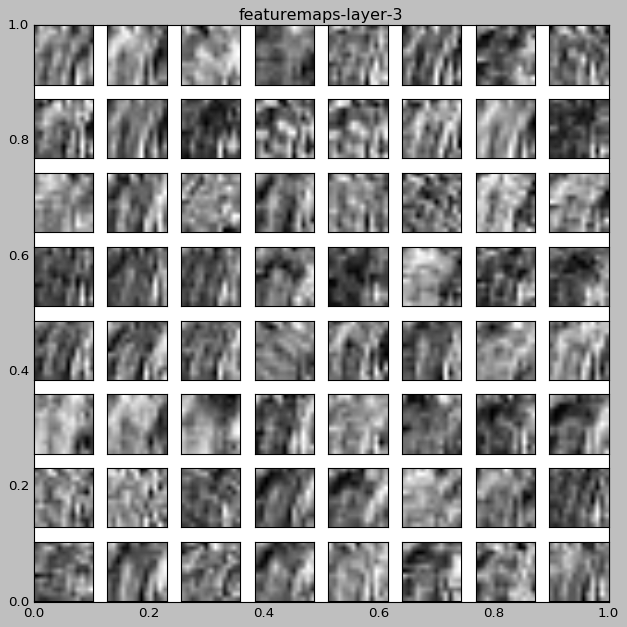

In [43]:
num_of_featuremaps=feature_maps.shape[2]
fig=plt.figure(figsize=(8,8))	
plt.title("featuremaps-layer-{}".format(layer_num))
subplot_num=int(np.ceil(np.sqrt(num_of_featuremaps)))
for i in range(int(num_of_featuremaps)):
    ax = fig.add_subplot(subplot_num, subplot_num, i+1)
    #ax.imshow(output_image[0,:,:,i],interpolation='nearest' ) #to see the first filter
    ax.imshow(feature_maps[:,:,i],cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
plt.show()
fig.savefig("featuremaps-layer-{}".format(layer_num) + '.jpg')

### Confusion matrix

In [44]:
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(X_test)
#print(Y_pred)
y_pred = np.argmax(Y_pred, axis=1)
#print(y_pred)
#y_pred = model.predict_classes(X_test)
#print(y_pred)
target_names = ['class 0(cats)', 'class 1(Dogs)', 'class 2(Horses)','class 3(Humans)']

print(classification_report(np.argmax(y_test,axis=1), y_pred,target_names=target_names))

print(confusion_matrix(np.argmax(Y_test,axis=1), y_pred))

[[20  0  0  0]
 [ 0 20  0  0]
 [ 0  0 20  0]
 [ 0  0  0 20]]


In [45]:
# Plotting the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[20  0  0  0]
 [ 0 20  0  0]
 [ 0  0 20  0]
 [ 0  0  0 20]]


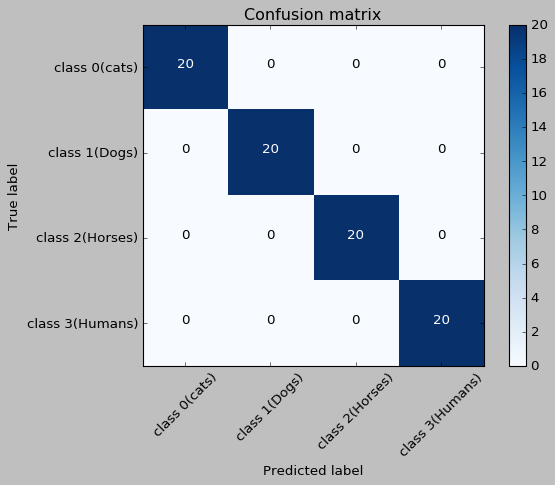

In [46]:
# Compute confusion matrix
cnf_matrix = (confusion_matrix(np.argmax(Y_test,axis=1), y_pred))

np.set_printoptions(precision=2)

plt.figure()

# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')
#plt.figure()
# Plot normalized confusion matrix
#plot_confusion_matrix(cnf_matrix, classes=target_names, normalize=True,
#                      title='Normalized confusion matrix')
#plt.figure()
plt.show()